In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import  GoogleCredentials
!pip install -q xlrd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import folium


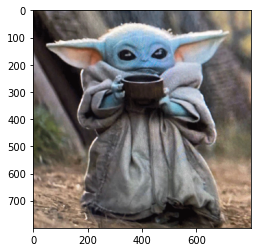

In [19]:
auth.authenticate_user()
gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1fwn9TcjWbilYj_sJabqwOFlo_VTXwXv-'}) 
downloaded.GetContentFile('x.png')
#dataset = pd.read_csv('covid19.csv')
downloaded = drive.CreateFile({'id':'1HSHIFQjvibSlEJ1pSmQUKlu3teCtj-Wq'}) 
downloaded.GetContentFile('c.png')
from matplotlib import image
img = image.imread(r'c.png')

img
plt.imshow(img)
plt.show()

In [0]:
import numpy as np
shape = np.shape(img)
pixel_data = []
for i in range(shape[0]):
    for j in range(shape[1]):
        pixel_data.append(img[i,j,:])
        

In [21]:
dataset=pixel_data
pd.DataFrame(dataset).shape

(640000, 3)

In [0]:
import random
def initialize_centers(K):
    array = []  
    for i in range(K):
        array.append([random.uniform(0, 1) for x in range(3)])
    return array
  

In [0]:
from scipy.spatial import distance



In [0]:
def closestdatapoint(center,array_data):
  #print("in")
  #print(center,array_data)
  from scipy.spatial import distance
  dst=[]
  for index in range(K):
    dst.append(distance.euclidean(center[index],array_data))
  #print(dst)  
  ind = np.argmin([dst])
  #print("-----------------------")
  #print(ind,center,array_data)
  return ind,array_data



In [0]:
dataset[2:3]

[array([0.19607843, 0.14901961, 0.13725491], dtype=float32)]

In [0]:
def k_means(K,iteration):

  initialized_ce=initialize_centers(K) 
  center=initialized_ce
  q=0
  for i in range(iteration):
    #print(center)
    dataset1=dataset
    #print(i)
    listodindex=[]
    for j in range(len(dataset1)): 
      ind,array_data= closestdatapoint(center,dataset1[j:j+1])
      listodindex.append([array_data,ind])
    numberofk=K 
    newcenter=[]
    #print(listodindex)
    while numberofk!=0: 
      #print("in")
      sumofx=0
      sumofy=0
      sumofz=0
      #print(listodindex[0][0][0][0])
      tedad=0
      for p in range(len(dataset)): 
        #print(p) 
        #print(listodindex[p][1],numberofk-1)
        if(listodindex[p][1]==numberofk-1): 
          tedad=tedad+1
          #print("yes")
         
          sumofx=sumofx+listodindex[p][0][0][0]
          sumofy=sumofy+listodindex[p][0][0][1]
          sumofz=sumofz+listodindex[p][0][0][2]
          #print(sumofx,sumofy)
      if tedad>0:
        newcenter.append([sumofx/tedad,sumofy/tedad,sumofz/tedad]) 
      if tedad==0:
        newcenter.append([sumofx,sumofy,sumofz])          
      #print(newcenter)
      numberofk=numberofk-1
      center=newcenter

  return center




In [0]:
dataset=pixel_data

In [10]:
listofallerror=[]

K=16
center=k_means(16,4) 
ld=[]
print(center)
for j in range(len(dataset)):  
        ind,array_data= closestdatapoint(center,dataset[j:j+1])
        ld.append(ind)

#  plt.scatter(dataset.iloc[:,0].values,dataset.iloc[:,1],c=ld) 
#  for i in range(K):
#    plt.scatter(center[i][0],center[i][1],c='red')
#  plt.show()
  #listofallerror.append(errorcal())




[[0.7496317621854424, 0.6427302600131592, 0.5500823949054007], [0, 0, 0], [0.6805985050810246, 0.7178336918433933, 0.7588143443973391], [0.3770603701455558, 0.5057195214979041, 0.6080764301296838], [0.4889266114586439, 0.6635914395252863, 0.8011521821220716], [0.15622081588650277, 0.13495870493352413, 0.13266478456944064], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.3203802952103816, 0.306061412439157, 0.294069391049759], [0, 0, 0], [0.03921568766236305, 0.027450980618596077, 0.0313725508749485], [0.45575417980505173, 0.4266862711108247, 0.407395601382297], [0.8730180775418, 0.8753310339591083, 0.8888519866326275], [0.5978775254844391, 0.5539864742967985, 0.5304009781095488]]


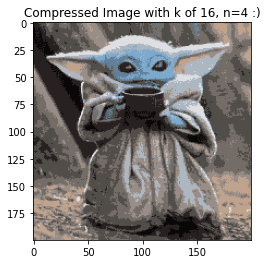

In [13]:

comp_pixel_data = []
for i in range(len(dataset)):
    di = ld[i]
    new_pixel = center[di]
    comp_pixel_data.append(new_pixel)
    
#reconstruct image
uio = np.array(img,copy=True)
index = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        uio[i,j] = comp_pixel_data[index]
        index += 1

plt.title("Compressed Image with k of 16, n=4 :)")
plt.imshow(uio)
plt.show()

In [16]:
listofallerror=[]

K=256
center=k_means(256,4) 
ld=[]
print(center)
for j in range(len(dataset)):  
        ind,array_data= closestdatapoint(center,dataset[j:j+1])
        ld.append(ind)


[[0.7789720134970582, 0.7814572872938933, 0.8100217978159586], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.46619866941691424, 0.6223836261549114, 0.791914803010446], [0.6596932989692313, 0.5698435862235162, 0.48802171622689033], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.8453585722229697, 0.7391471429304644, 0.6604963866147128], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.6501843050906533, 0.6671273971074506, 0.6801157495693156], [0.8462982860478487, 0.8570726961800547, 0.8828995910557833], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.4451150927854621, 0.6134356581646463, 0.7027110151622606], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.336021159806948, 0.604714718427551, 0.7957700055636717], [0, 0, 0], [0, 0, 0], [0.8021116256713867, 0.7161387801170349, 0.5040724208721747], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.627579461617075, 0.6106085978495

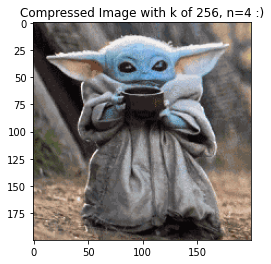

In [18]:

comp_pixel_data = []
for i in range(len(dataset)):
    di = ld[i]
    new_pixel = center[di]
    comp_pixel_data.append(new_pixel)
    
#reconstruct image
uio = np.array(img,copy=True)
npc = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        uio[i,j] = comp_pixel_data[npc]
        npc += 1

plt.title("Compressed Image with k of 256, n=4 :)")
plt.imshow(uio)
plt.show()

In [26]:
listofallerror=[]

K=16
center=k_means(16,4) 
ld=[]
print(center)
for j in range(len(dataset)):  
        ind,array_data= closestdatapoint(center,dataset[j:j+1])
        ld.append(ind)


[[0.8050886741635428, 0.8251918579143932, 0.8562034760675783], [0.733435889937114, 0.617390399225826, 0.5218503043743313], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.5494824910412947, 0.6801718586214343, 0.7972599793581961], [0.5823586495026298, 0.522438503405898, 0.4783818722181196], [0.29034712666991436, 0.28538503477719757, 0.2794750921473976], [0.03921568766236305, 0.027450980618596077, 0.0313725508749485], [0.3942617206689297, 0.36227606175249755, 0.33307513343040374], [0.4582686182391855, 0.4387969478512592, 0.4305682486679943], [0.6470709577744818, 0.6345441133666717, 0.6364666714558813], [0.37464535373628066, 0.5238765331706047, 0.6267424979170161], [0.15468029595227564, 0.13208276178658143, 0.13227372973103593]]


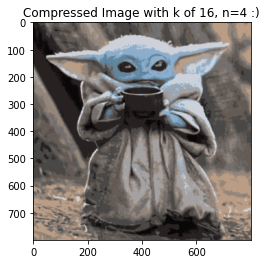

In [28]:

comp_pixel_data = []
for i in range(len(dataset)):
    di = ld[i]
    new_pixel = center[di]
    comp_pixel_data.append(new_pixel)
    
#reconstruct image
uio = np.array(img,copy=True)
npc = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        uio[i,j] = comp_pixel_data[npc]
        npc += 1

plt.title("Compressed Image with k of 16, n=4 :)")
plt.imshow(uio)
plt.show()

In [0]:
listofallerror=[]

K=256
center=k_means(256,4) 
ld=[]
print(center)
for j in range(len(dataset)):  
        ind,array_data= closestdatapoint(center,dataset[j:j+1])
        ld.append(ind)
comp_pixel_data = []
for i in range(len(dataset)):
    di = ld[i]
    new_pixel = center[di]
    comp_pixel_data.append(new_pixel)
    
#reconstruct image
uio = np.array(img,copy=True)
npc = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        uio[i,j] = comp_pixel_data[npc]
        npc += 1

plt.imshow(uio)
plt.show()        